In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("diabetes.csv")


In [3]:
from sklearn.model_selection import train_test_split

# Handle missing values if any
# Assuming the dataset doesn't have missing values.

# Split the data into X (features) and y (target)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


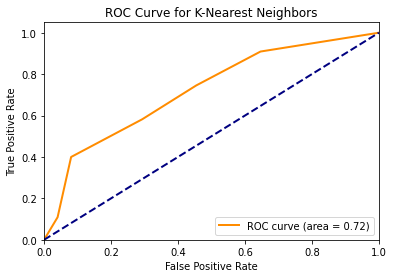

Classifier: K-Nearest Neighbors
Confusion Matrix:
[[70 29]
 [23 32]]
Accuracy: 0.66
Error Rate: 0.34
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154




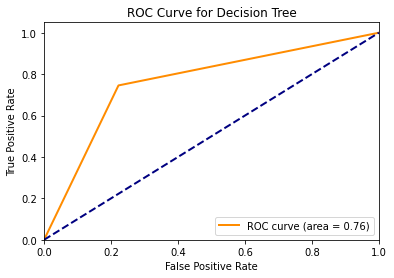

Classifier: Decision Tree
Confusion Matrix:
[[77 22]
 [14 41]]
Accuracy: 0.77
Error Rate: 0.23
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        99
           1       0.65      0.75      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.78      0.77      0.77       154




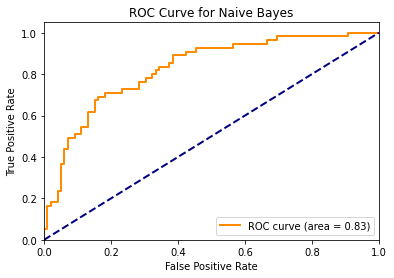

Classifier: Naive Bayes
Confusion Matrix:
[[79 20]
 [16 39]]
Accuracy: 0.77
Error Rate: 0.23
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154




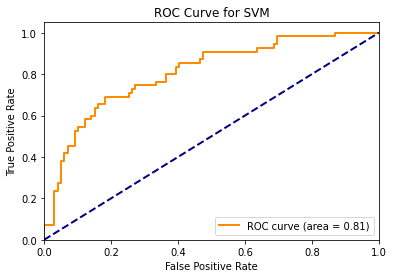

Classifier: SVM
Confusion Matrix:
[[87 12]
 [24 31]]
Accuracy: 0.77
Error Rate: 0.23
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154




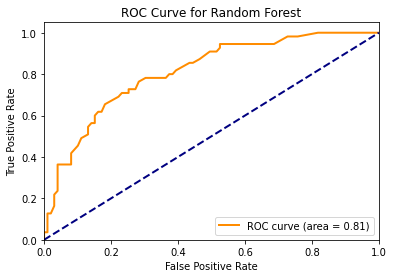

Classifier: Random Forest
Confusion Matrix:
[[81 18]
 [19 36]]
Accuracy: 0.76
Error Rate: 0.24
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154




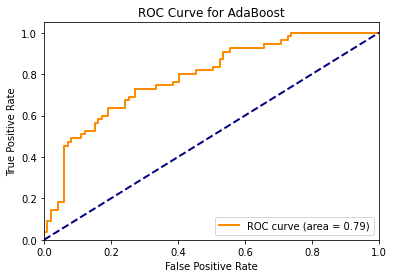

Classifier: AdaBoost
Confusion Matrix:
[[78 21]
 [20 35]]
Accuracy: 0.73
Error Rate: 0.27
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154




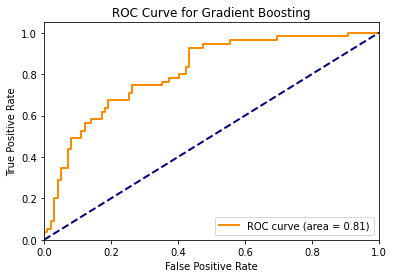

Classifier: Gradient Boosting
Confusion Matrix:
[[78 21]
 [18 37]]
Accuracy: 0.75
Error Rate: 0.25
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154




In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Initialize classifiers
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
nb = GaussianNB()
svm = SVC(probability=True)
rf = RandomForestClassifier()
adaboost = AdaBoostClassifier()
gradient_boosting = GradientBoostingClassifier()


classifiers = [knn, dt, nb, svm, rf, adaboost, gradient_boosting]
classifier_names = ['K-Nearest Neighbors', 'Decision Tree', 'Naive Bayes', 'SVM', 'Random Forest', 'AdaBoost', 'Gradient Boosting']

for clf, name in zip(classifiers, classifier_names):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Compute and print evaluation metrics
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    error_rate = 1 - accuracy
    report = classification_report(y_test, y_pred)
    
    # Compute ROC curve and AUC for binary classification
    if len(set(y_test)) == 2:
        fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {name}')
        plt.legend(loc="lower right")
        plt.show()

    print(f'Classifier: {name}')
    print(f'Confusion Matrix:\n{confusion}')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Error Rate: {error_rate:.2f}')
    print(f'Classification Report:\n{report}\n')


Classifier: K-Nearest Neighbors, Accuracy: 0.662338
Classifier: Decision Tree, Accuracy: 0.740260
Classifier: Naive Bayes, Accuracy: 0.766234
Classifier: SVM, Accuracy: 0.766234
Classifier: Random Forest, Accuracy: 0.746753
Classifier: AdaBoost, Accuracy: 0.733766
Classifier: Gradient Boosting, Accuracy: 0.740260
The best-performing classifiers are: Naive Bayes, SVM with an accuracy of 0.766234


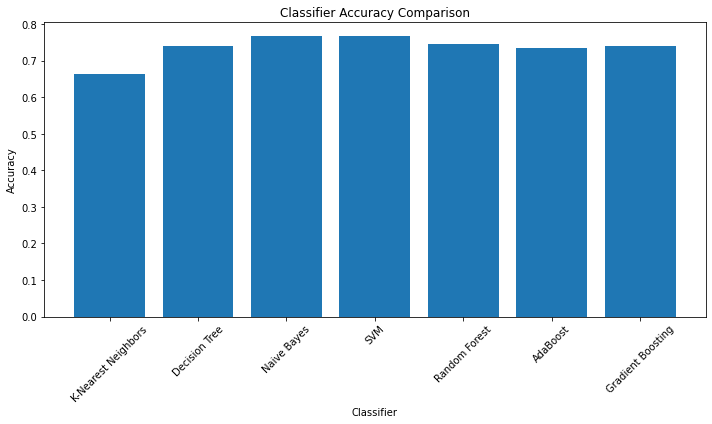

In [12]:
accuracy_scores = []
best_classifiers = []

# Find the highest accuracy
highest_accuracy = 0

for clf, name in zip(classifiers, classifier_names):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
     # Check if the current classifier has a higher accuracy
    if accuracy >= highest_accuracy:
        highest_accuracy = accuracy
    print(f'Classifier: {name}, Accuracy: {accuracy:.6f}')

# Identify and store all classifiers with the highest accuracy
for name, accuracy in zip(classifier_names, accuracy_scores):
    if accuracy == highest_accuracy:
        best_classifiers.append(name)

# Create a bar chart to compare accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, accuracy_scores)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.xticks(rotation=45)
plt.tight_layout()

# Find the best-performing classifier
# Print the best-performing classifier(s)
if len(best_classifiers) == 1:
    print(f"The best-performing classifier is: {best_classifiers[0]} with an accuracy of {highest_accuracy:.6f}")
else:
    best_classifiers_str = ', '.join(best_classifiers)
    print(f"The best-performing classifiers are: {best_classifiers_str} with an accuracy of {highest_accuracy:.6f}")
plt.show()